<a href="https://colab.research.google.com/github/shresthabhi/IIT_VT_capstone_project/blob/main/code/Reading_PED_json_data_line_by_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
input_location = os.getcwd()## ADD INPUT LOCATION

output_location = os.path.join("Y:\processed_Data","") ## ADD OUTPUT LOCATION
print(input_location, output_location) 

X:\Business Analytics Course\Patent project\data\ped_data Y:\processed_Data\


In [ ]:
def check_examiner_applicant_name(applicantBagOrInventoryBag):
    
    primaryExaminerCount = 0
    nameCount = 0
    
    personNameCount = 0
    
    primaryApplicantCount = 0
    applicantNameCount = 0
    
    examiner = "primaryExaminerOrAssistantExaminerOrAuthorizedOfficer"
    applicant = "applicant"
    
    for value in applicantBagOrInventoryBag:
        keys_in_value = value.keys()
        
        for key in keys_in_value:
            if(key == examiner):
                primaryExaminerCount+=1
                nameCount += len(value[examiner])
                
                personNameCount+=len(value[examiner][0]["name"]["personNameOrOrganizationNameOrEntityName"])
                
            elif(key == applicant):
                primaryApplicantCount+=1
                applicantNameCount += len(value[applicant])
                
            else:
                continue;
                
    return [primaryExaminerCount, nameCount], [primaryApplicantCount, applicantNameCount], personNameCount

def check_applicant_name(applicantBagOrInventoryBag):
    
    primaryExaminerCount = 0
    nameCount = 0
    level_1 = "applicant"
    
    for value in applicantBagOrInventoryBag:
        keys_in_value = value.keys()
        
        for key in keys_in_value:
            if(key == level_1):
                primaryExaminerCount+=1
                nameCount += len(value[level_1])
                
            else:
                continue;
                
    return primaryExaminerCount, nameCount

In [ ]:
def extract_examiner_name(application):
    
    applicantBagOrInventoryBag = application["patentCaseMetadata"]["partyBag"]["applicantBagOrInventorBagOrOwnerBag"]
    examiner = "primaryExaminerOrAssistantExaminerOrAuthorizedOfficer"
    
    for value in applicantBagOrInventoryBag:
        keys_in_value = value.keys()
        
        for key in keys_in_value:
            if(key == examiner):
                return value[examiner][0]["name"]["personNameOrOrganizationNameOrEntityName"][0]["personFullName"]
    

def extract_prosecution_history(application):
    
    prosecutionHistory  = application["prosecutionHistoryDataBag"]["prosecutionHistoryData"]
    prosecutionDate = []
    prosecutionEventDescription = []
    prosecutionEventCode = []
    
    final_data = []
    
    for event in prosecutionHistory:
        e = []
        
        eventCode = event.get("eventCode")
        if(eventCode != None):
            e.append(eventCode)
        else :
            e.append(np.nan)


        eventDate = event.get("eventDate")
        if(eventDate != None):
            e.append(eventDate)
        else :
            e.append(np.nan)

        eventDescriptionText = event.get("eventDescriptionText")
        if(eventDescriptionText != None):
            e.append(eventDescriptionText)
        else :
            e.append(np.nan)
            
        final_data.append(e)
            
    return final_data
    
def extract_content_resource(application):
    
    contentResource = application["contentResourceBag"]["contentResource"]
    
    officialDates = []
    documentCodes = []
    descriptionTexts = []
    documentCategories = []
    pageTotalQuantities = []
    
    for event in contentResource:
        
        officialDate = event.get("officialDate")
        if(officialDate != None):
            officialDates.append(officialDate)
        else :
            officialDates.append(np.nan)
            
        documentCode = event.get("documentCode")
        if(documentCode != None):
            documentCodes.append(documentCode)
        else :
            documentCodes.append(np.nan)
            
        descriptionText = event.get("descriptionText")
        if(descriptionText != None):
            descriptionTexts.append(descriptionText)
        else :
            descriptionTexts.append(np.nan)
            
        documentCategory = event.get("documentCategory")
        if(documentCategory != None):
            documentCategories.append(documentCategory)
        else :
            documentCategories.append(np.nan)
            
        pageTotalQuantity = event.get("pageTotalQuantity")
        if(pageTotalQuantity != None):
            pageTotalQuantities.append(pageTotalQuantity)
        else :
            pageTotalQuantities.append(np.nan)
            
    
    return officialDates, documentCodes, descriptionTexts, documentCategories, pageTotalQuantities
    
    


An exception occurred : 1
An exception occurred : 448889
448889


In [ ]:
counter = 0;                   # Total json file
errorCounter = 0               # Total json file that couldn't be processed
loadCounter = 0                # Total json file that were processed
errorLog = defaultdict(int)    # Variables which were not present

data_dict_1 = defaultdict(list)
data_dict_2 = defaultdict(list) 
files =['2021'] ## ['2018','2019','2020','2021','2022'] ## ADD THE YEARS

# data = pd.DataFrame({'app_filing_date': {},
#  'app_type_category': {},
#  'app_business_entity_cat': {},
#  'app_FITFI': {},
#  'app_status_cat': {},
#  'app_status_date': {},
#  'app_file_location_cat': {},
#  'app_num_value': {},
#  'app_num_electronic': {},
#  'app_group_art_value': {},
#  'app_group_art_electronic': {},
#  'examiner_name': {},
#  'prosecutionDate': {},
#  'prosecutionEventCode': {},
#  'prosecutionEventDescription': {}})

for file in files:
    file_name = file + '.json'
    with open(file_name, encoding = "utf-8") as f:
        for line in f:

            ## convert the line into proper json
            counter+=1;
            try:
                if(counter != 1):
                    application = json.loads(line[1:-1])
                    loadCounter+=1;
                else:
                    application = json.loads(line[:-1])
            except (json.decoder.JSONDecodeError):
                print("An exception occurred :", counter)
                errorCounter+=1
                continue;

            ## Read data from json
            try:

                app_filing_date           = application["patentCaseMetadata"]["filingDate"]
                app_type_category         = application["patentCaseMetadata"]["applicationTypeCategory"]
                app_business_entity_cat   = application["patentCaseMetadata"]["businessEntityStatusCategory"]
                app_FITFI                 = application["patentCaseMetadata"]["firstInventorToFileIndicator"]
                app_status_cat            = application["patentCaseMetadata"]["applicationStatusCategory"]
                app_status_date           = application["patentCaseMetadata"]["applicationStatusDate"]
                app_file_location_cat     = application["patentCaseMetadata"]["officialFileLocationCategory"]
                app_num_value             = application["patentCaseMetadata"]["applicationNumberText"]["value"]
                app_num_electronic        = application["patentCaseMetadata"]["applicationNumberText"]["electronicText"]




                app_group_art_value       = application["patentCaseMetadata"]["groupArtUnitNumber"]["value"]
                app_group_art_electronic  = application["patentCaseMetadata"]["groupArtUnitNumber"]["electronicText"]
                officialDates, documentCodes, descriptionTexts, documentCategories, pageTotalQuantities = extract_content_resource(application)

                examiner_name = extract_examiner_name(application)
                prosecutionDate = extract_prosecution_history(application)

            except KeyError as e:
                errorLog[str(e)] += 1



            main_cols = ["app_filing_date"
                         , "app_type_category"
                         , "app_business_entity_cat"
                         , "app_FITFI"
                         , "app_status_cat"
                         , "app_status_date"
                         , "app_file_location_cat"
                         , "app_num_value"
                         , "app_num_electronic"
                         , "app_group_art_value"
                         , "app_group_art_electronic"
                         , "examiner_name"]

            prosecution_cols = ["prosecutionDate"]

            content_cols = ["officialDates"
                           , "documentCodes"
                           , "descriptionTexts"
                           , "documentCategories"
                           , "pageTotalQuantities"]

            for col in main_cols + prosecution_cols:
                if(locals()[col] != None):
                    data_dict_1[col].append(locals()[col])
                else :
                    data_dict_1[col].append(np.nan)

    #         data = pd.concat([data, pd.DataFrame(data_dict_1)], axis = 0)

    #         del data_dict_1
    #         data_dict_1 = defaultdict(list)

    #         for col in main_cols + content_cols:
    #             if(locals()[col] != None):
    #                 data_dict_2[col].append(locals()[col])
    #             else :
    #                 data_dict_2[col].append(np.nan)

            if(counter%50000 == 0):

                data = pd.DataFrame(data_dict_1)
                data = data.explode("prosecutionDate")
                data[["code", "date", "desc"]] = data["prosecutionDate"].to_list()
                output_file_name = "{}_{}.parquet".format(counter, file)
                output_file = os.path.join(output_location, output_file_name)
                data.to_parquet(output_file, index = False)
                del data_dict_1
                data_dict_1 = defaultdict(list)
                del data

                print(str(counter) + " A file has been processed")

        data = pd.DataFrame(data_dict_1)
        data = data.explode("prosecutionDate")
        data[["code", "date", "desc"]] = data["prosecutionDate"].to_list()
        output_file_name = "{}_{}.parquet".format(counter, file)
        output_file = os.path.join(output_location, output_file_name)
        data.to_parquet(output_file, index = False)
        del data_dict_1
        data_dict_1 = defaultdict(list)
        del data

        print(str(counter) + " A file has been processed")
        print(file, counter, loadCounter, errorCounter, errorLog)

An exception occurred : 1
50000 A file has been processed
100000 A file has been processed
150000 A file has been processed
200000 A file has been processed
250000 A file has been processed
300000 A file has been processed
350000 A file has been processed
400000 A file has been processed
450000 A file has been processed
500000 A file has been processed
An exception occurred : 548241
548241 A file has been processed
2018 548241 548239 2 defaultdict(<class 'int'>, {"'groupArtUnitNumber'": 83183, "'applicationStatusCategory'": 2732, "'officialFileLocationCategory'": 9847, "'contentResourceBag'": 840, "'applicationTypeCategory'": 2648})
An exception occurred : 548242
550000 A file has been processed
600000 A file has been processed
650000 A file has been processed
700000 A file has been processed
750000 A file has been processed
800000 A file has been processed
850000 A file has been processed
900000 A file has been processed
950000 A file has been processed
1000000 A file has been process

In [ ]:
counter

46290

In [ ]:
data = pd.DataFrame(data_dict_1)
data = data.explode("prosecutionDate")
data[["code", "date", "desc"]] = data["prosecutionDate"].to_list()
data.to_csv(str(counter) + "_" + file + "_prosecution_file.csv")

In [ ]:
data = data.explode("prosecutionDate")

In [ ]:
data[data.app_num_electronic == '29821669'].to_csv("example_data.csv")

In [ ]:
def process_and_combine_parquet(files, cols, output_location = None):
    
    
    if(output_location == None):
        output_location = ""
    
    main_data = pd.DataFrame()
    
    for file in files:
        file_location = os.path.join(output_location, file)
        data = pd.read_parquet(file_location)
        data = data[cols].drop_duplicates()
        
        main_data = pd.concat([main_data, data], axis = 0)
    
    return main_data
    

In [ ]:
files = os.listdir(output_location)
cols = ["app_num_value", "app_filing_date", "app_group_art_value", "examiner_name", 'code', 'date', 'desc']

main_data = process_and_combine_parquet(files, cols, output_location)

In [ ]:
main_data.shape

(91603561, 6)

In [ ]:
main_data.to_parquet(os.path.join(output_location, "final_data.parquet"))
# main_data.to_csv(os.path.join(output_location, "final_data.csv"), index = False)

ArrowMemoryError: realloc of size 2147483648 failed

In [ ]:
data_1.head(0).to_dict()

{'app_filing_date': {},
 'app_type_category': {},
 'app_business_entity_cat': {},
 'app_FITFI': {},
 'app_status_cat': {},
 'app_status_date': {},
 'app_file_location_cat': {},
 'app_num_value': {},
 'app_num_electronic': {},
 'app_group_art_value': {},
 'app_group_art_electronic': {},
 'examiner_name': {},
 'prosecutionDate': {},
 'prosecutionEventCode': {},
 'prosecutionEventDescription': {}}

In [ ]:
data_1.explode("prosecutionDate")

,app_filing_date,app_type_category,app_business_entity_cat,app_FITFI,app_status_cat,app_status_date,app_file_location_cat,app_num_value,app_num_electronic,app_group_art_value,app_group_art_electronic,examiner_name,prosecutionDate,prosecutionEventCode,prosecutionEventDescription
0,2021-11-15,Utility,SMALL,true,Docketed New Case - Ready for Examination,2022-02-08,ELECTRONIC,17526655,17526655,OPAP,OPAP,"CENTRAL, DOCKET",2022-08-22,"[EML_NTR, PA.., EML_NTR, CCRDY, PG-ISSUE, M844...","[Email Notification, Change in Power of Attorn..."
0,2021-11-15,Utility,SMALL,true,Docketed New Case - Ready for Examination,2022-02-08,ELECTRONIC,17526655,17526655,OPAP,OPAP,"CENTRAL, DOCKET",2022-08-22,"[EML_NTR, PA.., EML_NTR, CCRDY, PG-ISSUE, M844...","[Email Notification, Change in Power of Attorn..."
0,2021-11-15,Utility,SMALL,true,Docketed New Case - Ready for Examination,2022-02-08,ELECTRONIC,17526655,17526655,OPAP,OPAP,"CENTRAL, DOCKET",2022-05-20,"[EML_NTR, PA.., EML_NTR, CCRDY, PG-ISSUE, M844...","[Email Notification, Change in Power of Attorn..."
0,2021-11-15,Utility,SMALL,true,Docketed New Case - Ready for Examination,2022-02-08,ELECTRONIC,17526655,17526655,OPAP,OPAP,"CENTRAL, DOCKET",2022-05-19,"[EML_NTR, PA.., EML_NTR, CCRDY, PG-ISSUE, M844...","[Email Notification, Change in Power of Attorn..."
0,2021-11-15,Utility,SMALL,true,Docketed New Case - Ready for Examination,2022-02-08,ELECTRONIC,17526655,17526655,OPAP,OPAP,"CENTRAL, DOCKET",2022-05-19,"[EML_NTR, PA.., EML_NTR, CCRDY, PG-ISSUE, M844...","[Email Notification, Change in Power of Attorn..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,2021-12-31,Provisional,UNDISCOUNTED,Other,Patented Case,2022-09-21,ELECTRONIC,29821669,29821669,2915,2915,"PHILIPPS, MARK T",2021-12-31,"[PGM/, EML_NTR, WPIR, D1935, PILS, N084, IFEE,...","[Recordation of Patent Grant Mailed, Email Not..."
48887,2021-12-31,Provisional,UNDISCOUNTED,Other,Patented Case,2022-09-21,ELECTRONIC,29821669,29821669,2915,2915,"PHILIPPS, MARK T",2021-12-31,"[PGM/, EML_NTR, WPIR, D1935, PILS, N084, IFEE,...","[Recordation of Patent Grant Mailed, Email Not..."
48887,2021-12-31,Provisional,UNDISCOUNTED,Other,Patented Case,2022-09-21,ELECTRONIC,29821669,29821669,2915,2915,"PHILIPPS, MARK T",2022-01-03,"[PGM/, EML_NTR, WPIR, D1935, PILS, N084, IFEE,...","[Recordation of Patent Grant Mailed, Email Not..."
48887,2021-12-31,Provisional,UNDISCOUNTED,Other,Patented Case,2022-09-21,ELECTRONIC,29821669,29821669,2915,2915,"PHILIPPS, MARK T",2021-12-31,"[PGM/, EML_NTR, WPIR, D1935, PILS, N084, IFEE,...","[Recordation of Patent Grant Mailed, Email Not..."


In [ ]:
data = pd.read_csv("400000_2021_prosecution_file.csv")

In [ ]:
data["prosecutionEventCode"].astype(list)

TypeError: dtype '<class 'list'>' not understood

In [ ]:
data_1["prosecutionEventCode"].explode().head()

0     EML_NTR
0        PA..
0     EML_NTR
0       CCRDY
0    PG-ISSUE
Name: prosecutionEventCode, dtype: object

In [ ]:
data_1.dtypes

app_filing_date                object
app_type_category              object
app_business_entity_cat        object
app_FITFI                      object
app_status_cat                 object
app_status_date                object
app_file_location_cat          object
app_num_value                  object
app_num_electronic             object
app_group_art_value            object
app_group_art_electronic       object
examiner_name                  object
prosecutionDate                object
prosecutionEventCode           object
prosecutionEventDescription    object
dtype: object

In [ ]:
d = defaultdict(list)


for col in cols:
    d[col].append(locals()[col])

In [ ]:
counter

448889

In [ ]:
primaryExaminerCount, counter, primaryExaminerCount, nameCount, primaryApplicantCount, applicantNameCount

(0, 28, 0, 0, 0, 0)

In [ ]:
keyErrorCounter/counter

0.12199006881433941

In [ ]:
errorLog

defaultdict(int,
            {"'groupArtUnitNumber'": 21113,
             "'applicationStatusCategory'": 28798,
             "'officialFileLocationCategory'": 4219,
             "'applicationTypeCategory'": 629})

In [ ]:
28798/counter

0.06415394451635037

In [ ]:
[*application.keys()]

['patentCaseMetadata',
 'prosecutionHistoryDataBag',
 'assignmentDataBag',
 'contentResourceBag',
 'st96Version',
 'ipoVersion']

In [ ]:
print((endTime - startTime)/60)

2.867055614789327


In [ ]:
for keys in freq.keys():
    freq[keys] /= counter

In [ ]:
print(counter, errorCounter, loadCounter)

448889 2 448887


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

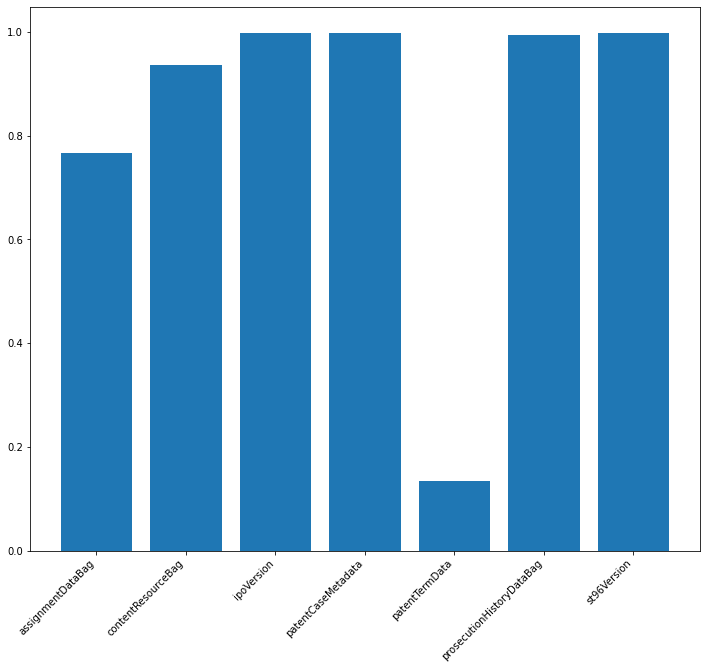

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

plt.bar(x = [*freq.keys()], height = [*freq.values()])
plt.xticks(rotation=45, ha='right')

In [ ]:
line

'] }'

In [ ]:
application

{'patentCaseMetadata': {'applicationNumberText': {'value': '17140048',
   'electronicText': '17140048'},
  'filingDate': '2021-01-02',
  'applicationTypeCategory': 'Utility',
  'partyBag': {'applicantBagOrInventorBagOrOwnerBag': [{'primaryExaminerOrAssistantExaminerOrAuthorizedOfficer': [{'name': {'personNameOrOrganizationNameOrEntityName': [{'personFullName': 'CENTRAL, DOCKET'}]}}]},
    {'applicant': [{'contactOrPublicationContact': [{'name': {'personNameOrOrganizationNameOrEntityName': [{'organizationStandardName': {'content': ['ELITE DESIGNED CONCRETE INC.']}}]},
         'cityName': 'Thornhill',
         'geographicRegionName': {'value': '',
          'geographicRegionCategory': 'STATE'},
         'countryCode': 'CA'}]}]},
    {'inventorOrDeceasedInventor': [{'contactOrPublicationContact': [{'name': {'personNameOrOrganizationNameOrEntityName': [{'personStructuredName': {'firstName': 'Raffy',
             'middleName': '',
             'lastName': 'Hanimyan'}}]},
         'cityName

In [ ]:
json.dumps(application)

'{"patentCaseMetadata": {"applicationNumberText": {"value": "17140048", "electronicText": "17140048"}, "filingDate": "2021-01-02", "applicationTypeCategory": "Utility", "partyBag": {"applicantBagOrInventorBagOrOwnerBag": [{"primaryExaminerOrAssistantExaminerOrAuthorizedOfficer": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"personFullName": "CENTRAL, DOCKET"}]}}]}, {"applicant": [{"contactOrPublicationContact": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"organizationStandardName": {"content": ["ELITE DESIGNED CONCRETE INC."]}}]}, "cityName": "Thornhill", "geographicRegionName": {"value": "", "geographicRegionCategory": "STATE"}, "countryCode": "CA"}]}]}, {"inventorOrDeceasedInventor": [{"contactOrPublicationContact": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"personStructuredName": {"firstName": "Raffy", "middleName": "", "lastName": "Hanimyan"}}]}, "cityName": "Thornhill", "geographicRegionName": {"value": "", "geographicRegionCategory": "STATE

In [ ]:
json.dumps(application)

'{"patentCaseMetadata": {"applicationNumberText": {"value": "63133257", "electronicText": "63133257"}, "filingDate": "2021-01-01", "applicationTypeCategory": "Provisional", "partyBag": {"applicantBagOrInventorBagOrOwnerBag": [{"inventorOrDeceasedInventor": [{"contactOrPublicationContact": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"personStructuredName": {"firstName": "Qi", "middleName": "", "lastName": "Zhou"}}]}, "cityName": "West Lafayette", "geographicRegionName": {"value": "IN", "geographicRegionCategory": "STATE"}, "countryCode": "US"}]}, {"contactOrPublicationContact": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"personStructuredName": {"firstName": "Maizbha", "middleName": "Uddin", "lastName": "Ahmed"}}]}, "cityName": "West Lafayette", "geographicRegionName": {"value": "IN", "geographicRegionCategory": "STATE"}, "countryCode": "US"}]}, {"contactOrPublicationContact": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"personStructuredName": {"fi

In [ ]:
for application in applications:
    a = [*application.keys()]
    break

In [ ]:
a = np.array([], dtype = "str")

a = np.append(a,[*application.keys()])

In [ ]:
a = np.append(a,[*application.keys()])

In [ ]:
len(np.unique(a, return_counts=True)[0])

6

In [ ]:
print((endTime - startTime))

137.52074575424194


In [ ]:
try:
    json.loads(line+"]}")

An exception occurred


In [ ]:
json.loads(line+"]}")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
json.load('{"Dfa":"1","gjh":"23"}')

AttributeError: 'str' object has no attribute 'read'

In [ ]:
line

'] }'

In [ ]:
app_filing_date           = application["patentCaseMetadata"]["filingDate"]
app_type_category         = application["patentCaseMetadata"]["applicationTypeCategory"]
app_business_entity_cat   = application["patentCaseMetadata"]["businessEntityStatusCategory"]
app_FITFI                 = application["patentCaseMetadata"]["firstInventorToFileIndicator"]
app_status_cat            = application["patentCaseMetadata"]["applicationStatusCategory"]
app_status_date           = application["patentCaseMetadata"]["applicationStatusDate"]
app_file_location_cat     = application["patentCaseMetadata"]["officialFileLocationCategory"]
app_num_value             = application["patentCaseMetadata"]["applicationNumberText"]["value"]
app_num_electronic        = application["patentCaseMetadata"]["applicationNumberText"]["electronicText"]




app_group_art_value       = application["patentCaseMetadata"]["groupArtUnitNumber"]["value"]
app_group_art_electronic  = application["patentCaseMetadata"]["groupArtUnitNumber"]["electronicText"]

In [ ]:
application["patentCaseMetadata"]["partyBag"]["applicantBagOrInventorBagOrOwnerBag"][0]#["primaryExaminerOrAssistantExaminerOrAuthorizedOfficer"]["name"]["personNameOrOrganizationNameOrEntityName"]["personFullName"]

KeyError: 0

In [ ]:
for value in application["patentCaseMetadata"]["partyBag"]["applicantBagOrInventorBagOrOwnerBag"]:
    keys = value.keys()
    
    keys_lookup = ['primaryExaminerOrAssistantExaminerOrAuthorizedOfficer', 'applicant', 'inventorOrDeceasedInventor', 'partyIdentifierOrContact']
    
    if('primaryExaminerOrAssistantExaminerOrAuthorizedOfficer' in keys):
        print(len(value['primaryExaminerOrAssistantExaminerOrAuthorizedOfficer'][0]))
    if('applicant' in keys):
        print(2)
    if('inventorOrDeceasedInventor' in keys):
        print(3)
    if('partyIdentifierOrContact' in keys):
        print(4)
        
        

1
2
3
4


In [ ]:
value["ered"]

KeyError: 'ered'

In [ ]:
json.dumps(application)

'{"patentCaseMetadata": {"applicationNumberText": {"value": "63136283", "electronicText": "63136283"}, "filingDate": "2021-01-12", "applicationTypeCategory": "Provisional", "partyBag": {"applicantBagOrInventorBagOrOwnerBag": [{"inventorOrDeceasedInventor": [{"contactOrPublicationContact": [{"name": {"personNameOrOrganizationNameOrEntityName": [{"personStructuredName": {"firstName": "Gary", "middleName": "M.", "lastName": "Cola"}}]}, "cityName": "Washington", "geographicRegionName": {"value": "MI", "geographicRegionCategory": "STATE"}, "countryCode": "US"}]}]}]}, "applicationConfirmationNumber": "8056", "applicantFileReference": "SFP A-370", "businessEntityStatusCategory": "SMALL", "firstInventorToFileIndicator": "Other", "inventionTitle": {"content": ["IMPACT RESISTANT PROTECTIVE MATERIALS FOR INCREASED SAFETY IN HOSTILE ENVIRONMENTS"]}, "officialFileLocationCategory": "ELECTRONIC", "relatedDocumentData": {"parentDocumentDataOrChildDocumentData": [{"descriptionText": "which is Publishe

In [ ]:
d = {"a" : [1,2], "b" : [1,2], "c" : [[1,2,3], [9,8]]}

In [ ]:
data = pd.DataFrame(d)

In [ ]:
data

,a,b,c
0,1,1,"[1, 2, 3]"
1,2,2,"[9, 8]"


In [ ]:
data[["a", "c"]].explode()

TypeError: explode() missing 1 required positional argument: 'column'

In [ ]:
application

{'patentCaseMetadata': {'applicationNumberText': {'value': '63295693',
   'electronicText': '63295693'},
  'filingDate': '2021-12-31',
  'applicationTypeCategory': 'Provisional',
  'partyBag': {'applicantBagOrInventorBagOrOwnerBag': [{'inventorOrDeceasedInventor': [{'contactOrPublicationContact': [{'name': {'personNameOrOrganizationNameOrEntityName': [{'personStructuredName': {'firstName': 'Pierre',
             'middleName': '',
             'lastName': 'Franquin'}}]},
         'cityName': 'Lexington',
         'geographicRegionName': {'value': 'MA',
          'geographicRegionCategory': 'STATE'},
         'countryCode': 'US'}]},
      {'contactOrPublicationContact': [{'name': {'personNameOrOrganizationNameOrEntityName': [{'personStructuredName': {'firstName': 'Ken',
             'middleName': '',
             'lastName': 'Krigelman'}}]},
         'cityName': 'Lexington',
         'geographicRegionName': {'value': 'MA',
          'geographicRegionCategory': 'STATE'},
         'country

In [ ]:
p = [{'eventDate': '2021-12-31',
    'eventCode': 'SREXR141',
    'eventDescriptionText': 'PTO/SB/69-Authorize EPO Access to Search Results'},
   {'eventDate': '2021-12-31',
    'eventCode': 'APPERMS',
    'eventDescriptionText': 'Applicants have given acceptable permission for participating foreign '},
   {'eventDate': '2021-12-31',
#     'eventCode': 'BIG.',
    'eventDescriptionText': 'Entity Status Set To Undiscounted (Initial Default Setting or Status Change)'},
   {'eventDate': '2021-12-31',
    'eventCode': 'IEXX',
    'eventDescriptionText': 'Initial Exam Team nn'}]

In [ ]:
prosecutionEventCode = []
prosecutionDate = []
prosecutionEventDescription = []

for e in p:
    
    eventCode = e.get("eventCode")
    if(eventCode != None):
        prosecutionEventCode.append(eventCode)
    else :
        prosecutionEventCode.append(np.nan)
    
    
    eventDate = e.get("eventDate")
    if(eventDate != None):
        prosecutionDate.append(eventDate)
    else :
        prosecutionDate.append(np.nan)
        
    eventDescriptionText = e.get("eventDescriptionText")
    if(eventDescriptionText != None):
        prosecutionEventDescription.append(eventDescriptionText)
    else :
        prosecutionEventDescription.append(np.nan)
    
    
    
#     print(e["eventDate"], e["eventCode"], e["eventDescriptionText"])

In [ ]:
d = {"a" : 1
     , "b" : 1
     , "prosecutionEventCode" : prosecutionEventCode
     , "prosecutionDate" : prosecutionDate
     , "eventDescriptionText" : eventDescriptionText}

In [ ]:
data = pd.DataFrame(d, )

In [ ]:
data

,a,b,prosecutionEventCode,prosecutionDate,eventDescriptionText
0,1,1,SREXR141,2021-12-31,Initial Exam Team nn
1,1,1,APPERMS,2021-12-31,Initial Exam Team nn
2,1,1,NaN,2021-12-31,Initial Exam Team nn
3,1,1,IEXX,2021-12-31,Initial Exam Team nn


In [ ]:
data["prosecutionEventCode"].isna()

0    False
1    False
2     True
3    False
Name: prosecutionEventCode, dtype: bool

In [ ]:
type(np.nan())

TypeError: 'float' object is not callable

In [ ]:
examiner_name

In [ ]:
type(examiner_name)

NoneType

In [ ]:
pd.DataFrame(data_dict_1)["app_num_value"] == 

,app_filing_date,app_type_category,app_business_entity_cat,app_FITFI,app_status_cat,app_status_date,app_file_location_cat,app_num_value,app_num_electronic,app_group_art_value,app_group_art_electronic,examiner_name,prosecutionDate,prosecutionEventCode,prosecutionEventDescription
0,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-07-29,ELECTRONIC,17139999,17139999,1629,1629,"ANDERSON, JAMES D","[2022-08-02, 2022-08-02, 2022-08-02, 2022-07-2...","[ELC_RVW, EML_NTF, MCTRS, CTRS, DOCK, DOCK, EM...","[Electronic Review, Email Notification, Mail R..."
1,2021-01-01,Utility,UNDISCOUNTED,true,Docketed New Case - Ready for Examination,2021-08-21,ELECTRONIC,17140004,17140004,OPAP,OPAP,"CENTRAL, DOCKET","[2022-07-27, 2022-07-27, 2022-07-07, 2022-07-0...","[M844, WIDS, CCRDY, PG-ISSUE, DOCK, M844, WIDS...","[Information Disclosure Statement (IDS) Filed,..."
2,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-11-28,ELECTRONIC,17140001,17140001,3774,3774,"PREBILIC, PAUL B","[2022-11-30, 2022-11-30, 2022-11-30, 2022-11-2...","[ELC_RVW, EML_NTF, MCTRS, CTRS, DOCK, DOCK, EM...","[Electronic Review, Email Notification, Mail R..."
3,2021-01-01,Utility,SMALL,true,Docketed New Case - Ready for Examination,2021-08-21,ELECTRONIC,17140012,17140012,OPAP,OPAP,"CENTRAL, DOCKET","[2022-07-08, 2022-07-07, 2022-07-07, 2021-08-2...","[EML_NTR, CCRDY, PG-ISSUE, DOCK, OIPE, EML_NTR...","[Email Notification, Application ready for PDX..."
4,2021-01-01,Utility,SMALL,true,Docketed New Case - Ready for Examination,2021-08-21,ELECTRONIC,17140015,17140015,OPAP,OPAP,"CENTRAL, DOCKET","[2021-08-21, 2021-07-29, 2021-07-29, 2021-01-2...","[DOCK, CCRDY, PG-ISSUE, OIPE, PGPC, FTFS, PTA....","[Case Docketed to Examiner in GAU, Application..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11856,2021-01-12,Provisional,SMALL,Other,Provisional Application Expired,2022-01-16,ELECTRONIC,63136268,63136268,2921,2921,NaN,"[2022-01-16, 2021-12-08, 2021-12-08, 2021-01-1...","[EXPRO, EML_NTR, PA.., EML_NTR, CCRDY, OIPE, C...","[EXPIRED PROVISIONAL, Email Notification, Chan..."
11857,2021-01-12,Provisional,SMALL,Other,Provisional Application Expired,2022-01-16,ELECTRONIC,63136281,63136281,2921,2921,NaN,"[2022-01-16, 2021-01-15, 2021-01-15, 2021-01-1...","[EXPRO, EML_NTR, CCRDY, OIPE, COMP, FLRCPT.O, ...","[EXPIRED PROVISIONAL, Email Notification, Appl..."
11858,2021-01-12,Provisional,UNDISCOUNTED,Other,Provisional Application Expired,2022-01-16,ELECTRONIC,63136281,63136281,2921,2921,NaN,"[2022-01-16, 2021-01-14, 2021-01-14, 2021-01-1...","[EXPRO, EML_NTR, CCRDY, OIPE, COMP, FLRCPT.O, ...","[EXPIRED PROVISIONAL, Email Notification, Appl..."
11859,2021-01-12,Provisional,UNDISCOUNTED,Other,Provisional Application Expired,2022-01-16,ELECTRONIC,63136275,63136275,2921,2921,NaN,"[2022-01-16, 2021-04-23, 2021-04-23, 2021-04-2...","[EXPRO, EML_NTR, CCRDY, OIPE, COMP, FLRCPT.O, ...","[EXPIRED PROVISIONAL, Email Notification, Appl..."


In [ ]:
data_dict_1["app_num_value"][-1]

'63136289'

In [ ]:
np.nan

nan

In [ ]:
counter%100000

50375

In [ ]:
counter

350375

In [ ]:
pd.DataFrame({'app_filing_date': {},
 'app_type_category': {},
 'app_business_entity_cat': {},
 'app_FITFI': {},
 'app_status_cat': {},
 'app_status_date': {},
 'app_file_location_cat': {},
 'app_num_value': {},
 'app_num_electronic': {},
 'app_group_art_value': {},
 'app_group_art_electronic': {},
 'examiner_name': {},
 'prosecutionDate': {},
 'prosecutionEventCode': {},
 'prosecutionEventDescription': {}})

,app_filing_date,app_type_category,app_business_entity_cat,app_FITFI,app_status_cat,app_status_date,app_file_location_cat,app_num_value,app_num_electronic,app_group_art_value,app_group_art_electronic,examiner_name,prosecutionDate,prosecutionEventCode,prosecutionEventDescription


In [ ]:
final_data = pd.read_csv("100000_2021_prosecution_file.csv")

In [ ]:
final_data.head()

,Unnamed: 0,app_filing_date,app_type_category,app_business_entity_cat,app_FITFI,app_status_cat,app_status_date,app_file_location_cat,app_num_value,app_num_electronic,app_group_art_value,app_group_art_electronic,examiner_name,prosecutionDate
0,0,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-07-29,ELECTRONIC,17139999,17139999,1629,1629,"ANDERSON, JAMES D","['ELC_RVW', '2022-08-02', 'Electronic Review']"
1,0,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-07-29,ELECTRONIC,17139999,17139999,1629,1629,"ANDERSON, JAMES D","['EML_NTF', '2022-08-02', 'Email Notification']"
2,0,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-07-29,ELECTRONIC,17139999,17139999,1629,1629,"ANDERSON, JAMES D","['MCTRS', '2022-08-02', 'Mail Restriction Requ..."
3,0,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-07-29,ELECTRONIC,17139999,17139999,1629,1629,"ANDERSON, JAMES D","['CTRS', '2022-07-28', 'Restriction/Election R..."
4,0,2021-01-01,Utility,SMALL,true,Non Final Action Mailed,2022-07-29,ELECTRONIC,17139999,17139999,1629,1629,"ANDERSON, JAMES D","['DOCK', '2022-04-09', 'Case Docketed to Exami..."


In [ ]:
final_data[] final_data["prosecutionDate"].head().apply(lambda x : np.array(literal_eval(x))).to_list()

[array(['ELC_RVW', '2022-08-02', 'Electronic Review'], dtype='<U17'),
 array(['EML_NTF', '2022-08-02', 'Email Notification'], dtype='<U18'),
 array(['MCTRS', '2022-08-02', 'Mail Restriction Requirement'],
       dtype='<U28'),
 array(['CTRS', '2022-07-28', 'Restriction/Election Requirement'],
       dtype='<U32'),
 array(['DOCK', '2022-04-09', 'Case Docketed to Examiner in GAU'],
       dtype='<U32')]

In [ ]:
from ast import literal_eval

In [ ]:
data[["code", "date", "desc"]] = data["prosecutionDate"].to_list()

In [ ]:
data.code

0         EML_NTR
0            PA..
0         EML_NTR
0           CCRDY
0        PG-ISSUE
           ...   
48887    SREXR141
48887     APPERMS
48887        WIDS
48887        BIG.
48887        IEXX
Name: code, Length: 1241618, dtype: object